<a href="https://colab.research.google.com/github/kio15978/colab/blob/main/%EC%9C%A0%ED%8C%90%EB%8D%B0_11w_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%ED%98%B8_%EC%83%9D%EC%A1%B4%EC%9C%A8_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **유판데 11w -  타이타닉호 생존율 분석**



---



\

# **< 데이터 수집 >**

In [1]:
import seaborn as sns

In [2]:
import pandas as pd

**타이타닉 데이터 로드**

In [5]:
titanic = sns.load_dataset("titanic")

In [6]:
titanic.to_csv('titanic.csv')

\

# **< 데이터 준비 >**

**변수 별 결측치 개수 확인**

In [7]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**age 결측치 중앙값으로 대체**

In [8]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

**◆ .value_counts()**

***각 종류별로 몇 개의 데이터가 있는지 세어주는 것***

In [9]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

-> embark_town 결측치 총 2개 있는데

embark_twon 종류별 데이터 개수를 확인해 보면 Southampton이 가장 많음

-> 결측치 Southampton

**embark_town의 결측치 Southampton으로 채워 넣기**

In [10]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [12]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

**deck의 결측치 C로 채워넣기**

In [13]:
titanic['deck'] = titanic['deck'].fillna('C')

In [14]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

\

# **< 데이터 탐색 >**

## **1. 데이터의 기본 정보 탐색**

**타이타닉 데이터의 기본 정보 확인**

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


-> 전체 샘플 수 : 891  속성 : 15


**(+ 타이타닉 변수 설명)**

pclass, class : 객실 등급

sibsp : 함께 탑승한 형제자매와 배우자 수

parch : 함꼐 탑승한 부모/자식 수

embarked, embarked_town : 탑승 항구

adult_male : 성인 남자 여부

alone : 동행 여부 True/False


**survived 속성값의 빈도 확인**

In [17]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

-> 샘플의 891명 중에

생존자 : 342명 (1)    사망자 : 549 (0)

## **2. 차트 그려 데이터를 시각적으로 탐색**

**차트 그리기 위해 matplotlib.pyplot 로드**



In [18]:
import matplotlib.pyplot as plt

### **남자 승객과 여자 승객의 생존율을 pie 차트로 그리기**

**한 줄에 두 개의 차트를 그리도록 하고 크기 설정**

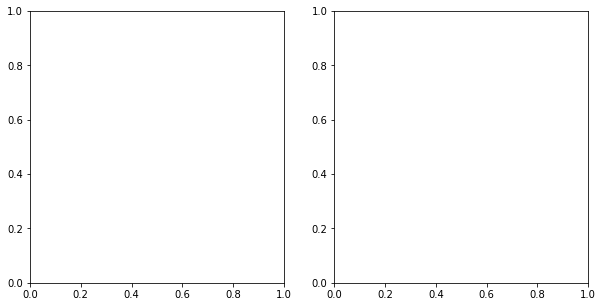

In [19]:
f,ax=plt.subplots(1,2,figsize=(10,5))

**첫 번째 pie 차트는 남자 승객의 생존율**

In [24]:
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)

**두 번째 pie 차트는 여자 승객의 생존율**

In [25]:
 titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)

**첫 번째 차트 제목 설정**

In [27]:
ax[0].set_title('Survived (Male)')

Text(0.5, 1.0, 'Survived (Male)')

**두 번째 차트 제목 설정**

In [28]:
 ax[1].set_title('Survived (Female)')

Text(0.5, 1.0, 'Survived (Female)')

In [30]:
plt.show()

## **3. 등급별 생존자 수를 차트로 나타내기**

**pclass 유형 1,2,3을 x축으로 하고**

**survived=0과 survived=1의 개수를 계산하여**

**y축으로 하는 countplot 설정**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


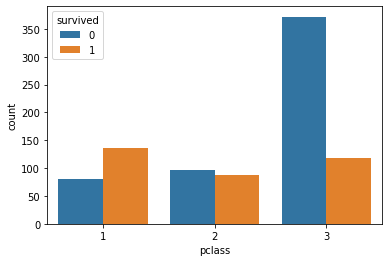

In [31]:
sns.countplot('pclass',hue='survived',data=titanic)

**차트 제목 설정**

Text(0.5, 1.0, 'Pclass vs Survived')

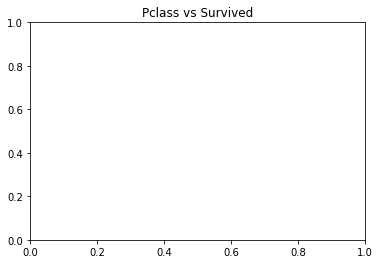

In [32]:
plt.title('Pclass vs Survived')

In [33]:
plt.show()

-> 생존자(1)는 1등급에서 가장 많음

사망자(0)은 3등급에서 월등히 많음

\

# **< 데이터 모델링 >**

## **1. 상관 분석을 위한 상관 계수 구하고 저장**

**피어슨 상관 계수를 적용하여 상관 계수 구함**

In [34]:
titanic_corr = titanic.corr(method='pearson')

**상관 계수 출력**

In [35]:
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [37]:
titanic_corr.to_csv('titanic_corr.csv')
files.download('titanic_corr.csv')

NameError: ignored

# **2. 상관 계수 확인**



*   남자 성인(adult_male) : 생존(survived)와 음의 상관관계
*   객실 등급(pclass) : 음의 상관관계

*   관계, 객실 요금(fare)은 양의 상관관계
*   동행 없이 혼자 탑승(alone) : 생존율이 떨어진다는 상관관계



## **3. 특정 변수 사이의 상관 계수 구하기**

**survived와 adult_male 변수 사이의 상관 계수**

In [38]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053257

**survived와 fare 변수 사이의 상관 계수**

In [39]:
titanic['survived'].corr(titanic['fare'])

0.2573065223849625

\

# **< 결과 시각화 >**

## **1. 두 변수의 상관관계 시각화**

**catplot() 함수 사용 pcalss와 survived 변수의 관계를 차트로 그림**

**hue 인자를 이용하여 종속 변수 sex로 지정**

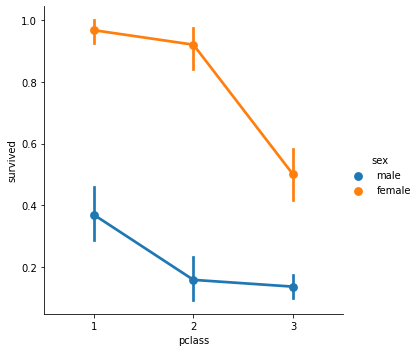

In [45]:
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')

In [46]:
plt.show()

## **2. 변수 사이의 상관 계수를 히트맵으로 시각화**

### **age를 카테고리 값으로 바꾸어 age2 변수 추가**

**10살 단위로 등급을 나누어 0~8 값으로 바꿔주는 category_age 함수 작성**

In [48]:
def category_age(x):
  if x < 10:
    return 0
  elif x < 20:
    return 1
  elif x < 30:
    return 2
  elif x < 40:
    return 3
  elif x < 50:
    return 4
  elif x < 60:
    return 5
  elif x < 70:
    return 6
  else:
    return 7

**category_age 함수를 적용하여 새로움 age2열 추가**

In [49]:
 titanic['age2'] = titanic['age'].apply(category_age)

**성별을 male/female에서 1/0 으로 치환**

In [50]:
 titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})

**가족 수를 구하여 family 열을 추가**

sibsp : 함께 탑승한 형제자매와 배우자 수


++ parch : 함꼐 탑승한 부모/자식 수

++ 1 본인

In [51]:
 titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

**수정된 데이터프레임을 titanic3.csv로 저장**

In [52]:
 titanic.to_csv('C:/Users/kmj/My_Python/7장_data/titanic3.csv', index =False)

FileNotFoundError: ignored

### **상관 분석 결과를 히트맵으로 나타내기**

**히트맵에 사용할 데이터 추출**

In [53]:
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass','fare']]

**히트맵에 사용할 색상맵 지정**

In [54]:
colormap = plt.cm.RdBu

**corr() 함수로 구한 상관 계수로 히트맵 생성**

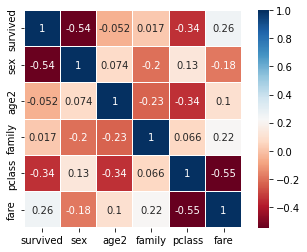

In [55]:
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax= 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True,annot_kws = {"size": 10})

In [56]:
plt.show()